### Homework 2.1.1 - 1D Wave

Solve the wave equation

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)** and **the frequency ($\omega$)** to make a nice time-animated graph video clip.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib inline

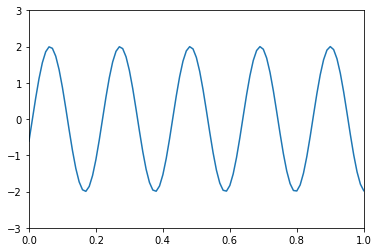

In [2]:
# Set up an array of ux0
N = 100
L = 1
x = np.linspace(0, L, num=N + 1, endpoint=True)
Ux0 = 0*x

Uold = Ux0
# Set up initial condition for the time derivative at t = 0
dUx0 = np.zeros(101)

dt = 0.01 # Set up time step size
dh = L / N # Spatial step size
c = 1
omega = 30
eps = ((dt*c/dh)**2)

# Calculate time step j = 1
Uxj = np.zeros(101)
for i in np.linspace(1, 99, 99, dtype=int):
    Uxj[i] = 0.5*eps*(Ux0[i+1] + Ux0[i-1]) + (1. - eps)*(Ux0[i]) + dt * dUx0[i]
Uxj[0] = 2*np.sin(omega*1*dt)

UAll = np.array([Uxj])
fig1 = plt.figure()
l = plt.plot(x, Uxj)
axes = plt.gca()
axes.set_ylim([-3,3])
axes.set_xlim([0,1])

for j in range(2,201):
    Unew = np.zeros(101)
    for i in np.linspace(1, 99, 99, dtype=int):
        Unew[i] = eps*(Uxj[i+1] + Uxj[i-1]) + 2.*(1. - eps)*Uxj[i] - Uold[i]
    Unew[0] = 2*np.sin(omega*j*dt)
    Unew[-1] = Uxj[-1] - c*(Uxj[-1] - Uxj[-2])
    Uold = Uxj
    Uxj = Unew
    UAll = np.vstack([UAll, Unew])
    #if j > 30:
    #    plt.plot(x, Unew)

def update_line(num, line):
    line.set_data(x, UAll[num])
    return line,

line_ani = animation.FuncAnimation(fig1, update_line, 200, fargs=(l), interval=20, blit=True)
# line_ani.save('wave-in-string.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
writergif = animation.PillowWriter(fps=30)
line_ani.save('wave-in-string.gif',writer=writergif)
plt.show()

___
### Homework 2.1.2 - 1D Wave with damping

Solve the wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)**, **the frequency ($\omega$)**, and **the damping factor ($k$)** to make a nice time-animated graph video clip.